# Plotting

This notebook is used exclusively to plot the changes in GDP growth rate and the growth rate of all the variables of interest.

In [ ]:
import pandas as pd # For data manipulation, reads in Stata files
import matplotlib.pyplot as plt # For plotting

In [ ]:
data = pd.read_stata("cleaned_data.dta")
data['year'] = pd.to_datetime(data['year'], format='%Y')


,year,developed,avh,hc,pop,pctivliteracy,g_gdp_per_cap,g_cellphone,g_ag_tractor,g_bed_hosp,g_vehicle_car,g_eft,g_avh,g_hc,g_pop,g_pctivliteracy
0,1950-01-01,0.0,2155.262621,1.356045,174.423141,386.522034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1951-01-01,0.0,2171.842994,1.366807,172.056064,395.204376,0.040280,0.000000,0.000000,0.000000,0.027801,0.000000,0.007405,0.008681,-0.053132,0.035857
2,1952-01-01,0.0,2168.364160,1.268709,332.273266,442.625916,-0.242344,0.000000,0.000000,0.000000,0.072738,0.000000,-0.001497,-0.064916,0.885047,0.218757
3,1953-01-01,0.0,2188.133538,1.284737,333.075735,455.852142,0.057052,0.000000,0.000000,0.000000,0.008477,0.000000,0.008623,0.012370,-0.011595,0.036346
4,1954-01-01,0.0,2189.998109,1.292695,337.104243,464.825012,-0.022662,0.000000,0.000000,0.000000,0.075056,0.000000,0.000772,0.006711,-0.001398,0.024749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1999-01-01,1.0,1766.915209,3.379264,166.996554,0.000000,0.023216,0.339283,-0.001514,-0.020427,0.235828,0.121595,-0.003017,0.004880,0.009141,0.000000
104,2000-01-01,1.0,1762.121713,3.395289,168.845516,995.065247,0.030182,0.321270,-0.005465,0.104128,0.244389,1.352150,-0.003235,0.004800,0.008594,0.000000
105,2001-01-01,1.0,1746.843112,3.408624,170.527695,0.000000,0.007468,0.148533,0.002544,0.000000,0.401300,0.178324,-0.008604,0.004037,0.007924,0.000000
106,2002-01-01,1.0,1730.703677,3.421800,172.065438,0.000000,0.005132,0.081627,0.000000,0.000000,-0.004515,0.146029,-0.009408,0.003968,0.007343,0.000000


In [30]:
# g_gdp_per_cap: $\Delta \log(GDP/pop)$
# g_cellphone: $\Delta \log(cellphone)$
# g_ag_tractor: $\Delta \log(tractor)$
# g_bed_hosp: $\Delta \log(hosp_bed)$
# g_vehicle_car: $\Delta \log(car)$
# g_eft: $\Delta \log(eft)$
# g_avh: $\Delta \log(avh)$
# g_hc: $\Delta \log(hc)$
# g_pop: $\Delta \log(pop)$
# g_pctivliteracy: $\Delta \log(pctivliteracy)$


# Set labels for plotting
labels = {
    r"g_gdp_per_cap": r"$\Delta \log(GDP/pop)$",
    r"g_cellphone": r"$\Delta \log(cellphone)$",
    r"g_ag_tractor": r"$\Delta \log(tractor)$",
    r"g_bed_hosp": r"$\Delta \log(hosp_bed)$",
    r"g_vehicle_car": r"$\Delta \log(car)$",
    r"g_eft": r"$\Delta \log(eft)$",
    r"g_avh": r"$\Delta \log(avh)$",
    r"g_hc": r"$\Delta \log(hc)$",
    r"g_pop": r"$\Delta \log(pop)$",
    r"g_pctivliteracy": r"$\Delta \log(pctivliteracy)$"
}

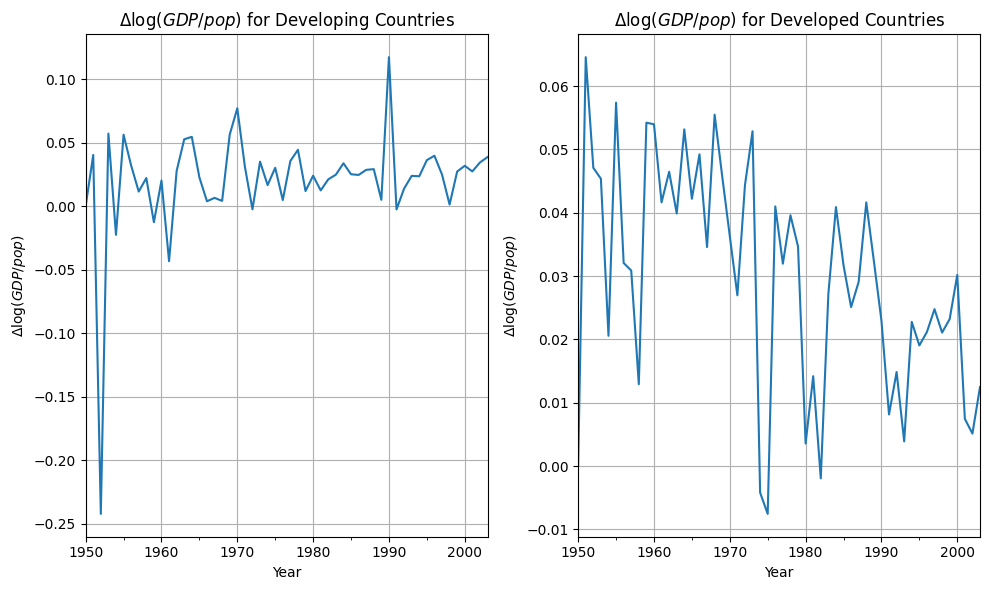

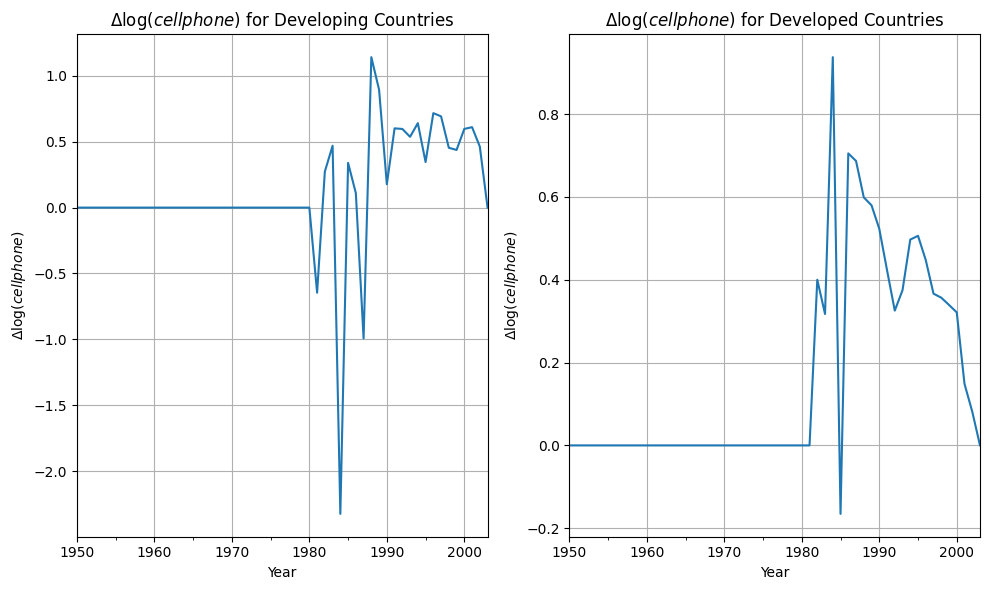

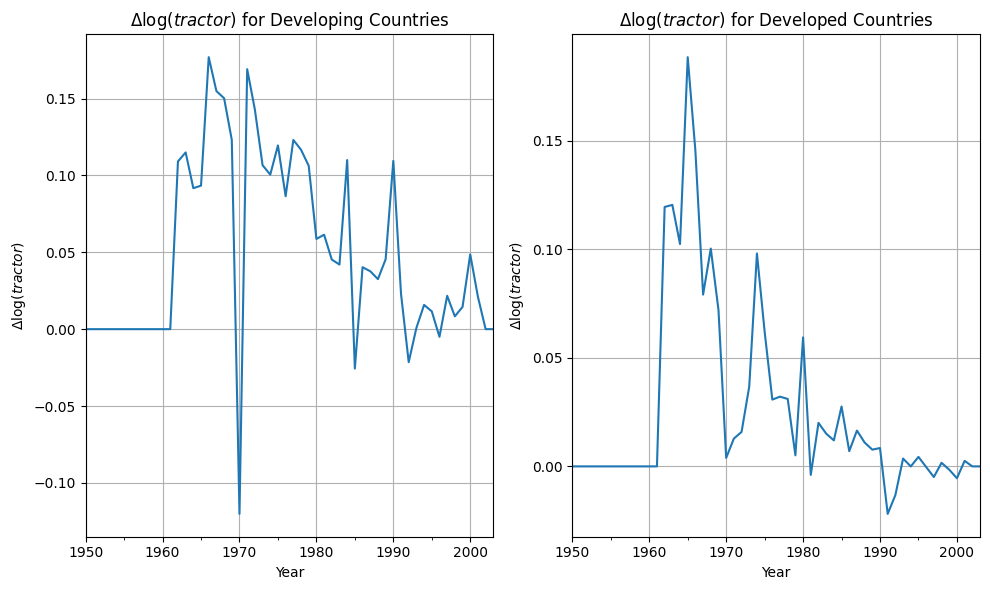

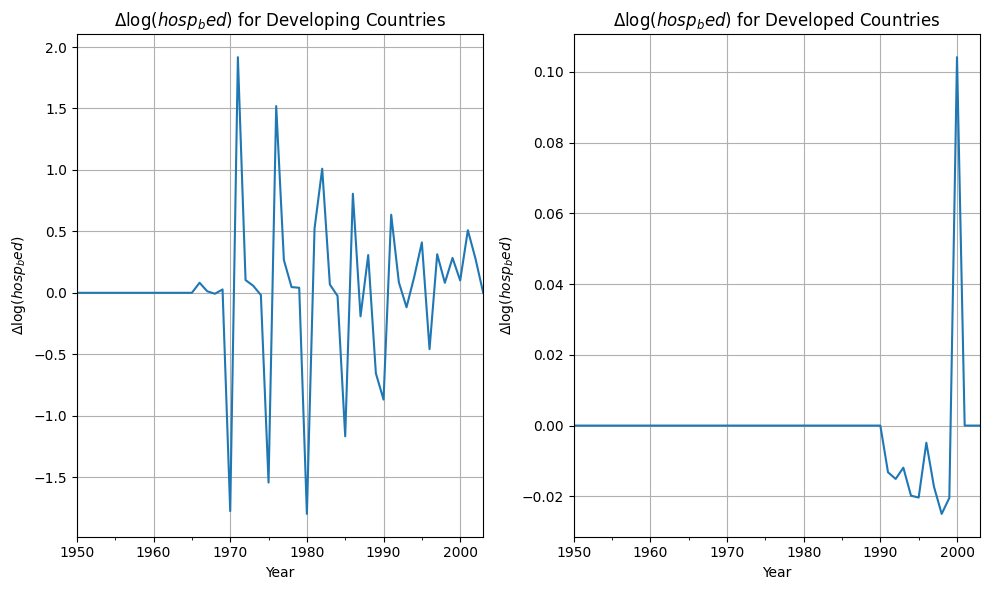

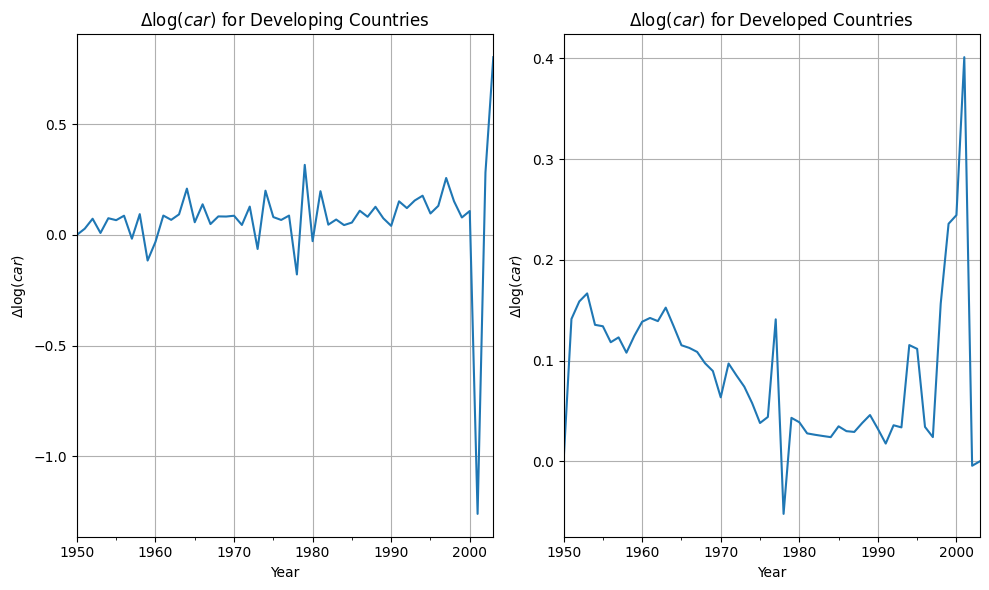

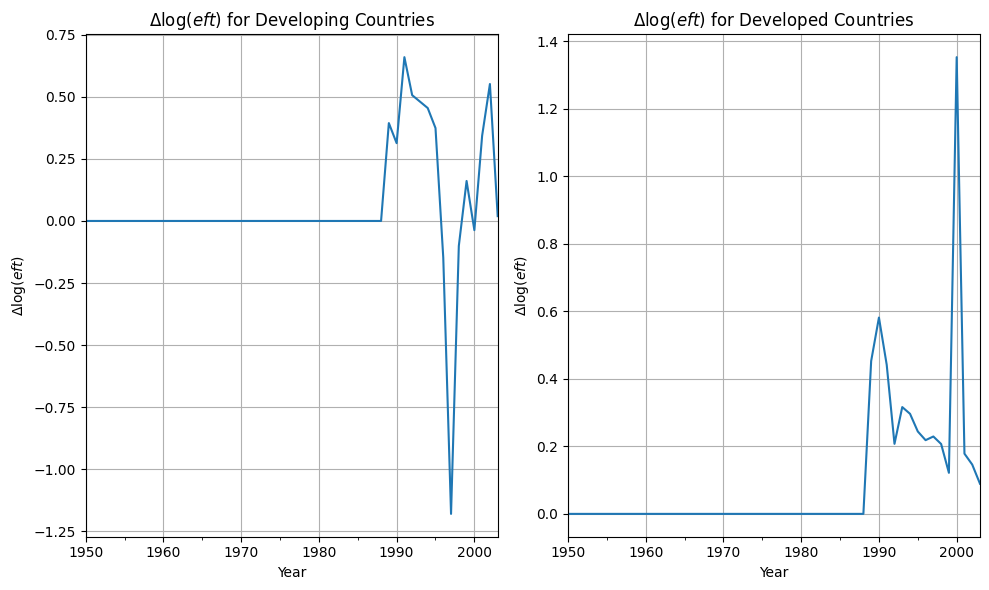

In [29]:
for column in data.columns[6:12]:
    # Create a new figure for each column
    plt.figure(figsize=(10, 6))

    for group, df in data[['year', 'developed', column]].groupby('developed'):
        plt.subplot(1, 2, int(group) + 1)
        df.index = pd.DatetimeIndex(df['year'])

        # Plot the data
        df[column].plot(label=None)

        plt.title(rf'{labels[column]} for {"Developed" if group == 1 else "Developing"} Countries')
        plt.xlabel('Year')
        plt.ylabel(labels[column])
        # plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.savefig(f'figures/{column}.png', dpi=300)
    plt.show()
        